In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Interpretarea coeficientilor regresiei

In [2]:
diamond = pd.read_csv('diamond.csv')
diamond.head()

,Unnamed: 0,carat,price
0,1,0.17,355
1,2,0.16,328
2,3,0.17,350
3,4,0.18,325
4,5,0.25,642


intercept: -259.6259071915547 coefficient: 3721.024851550472


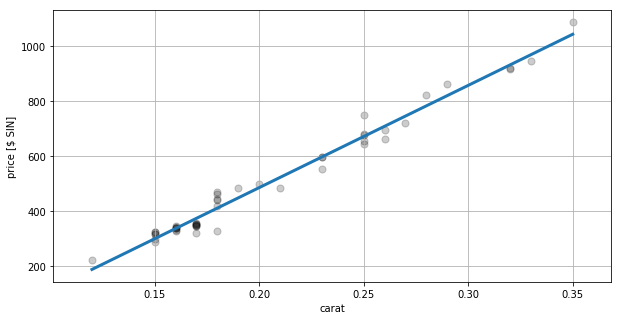

In [3]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta0 + beta1 * x1

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

mean(X): 0.2041666666666667
intercept: 500.0833333333334 coefficient: 3721.024851550472


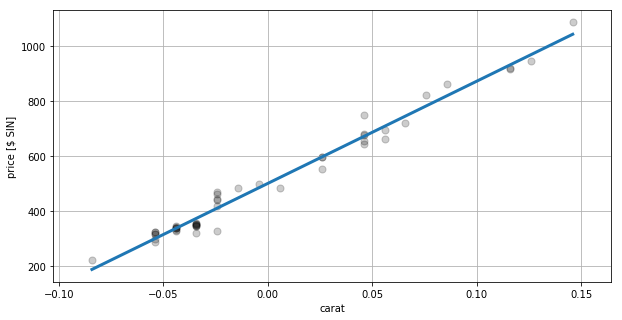

In [4]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

print('mean(X):', np.mean(x))
x -= np.mean(x)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

# Residuals

intercept: -259.6259071915547 coefficient: 3721.024851550472


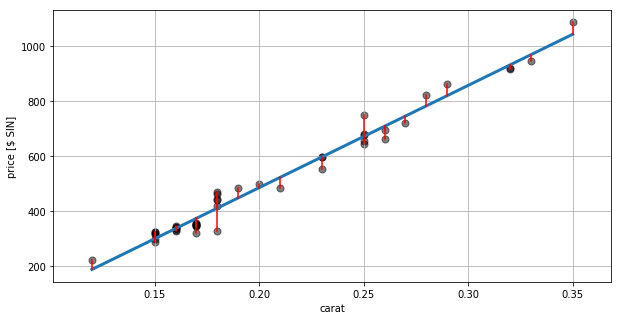

In [5]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

In [6]:
np.sum(y - yf)

2.2168933355715126e-12

In [7]:
# acestea sunt residuals, fie le luam din model, fie calculate
print(lm.resid), print(y - yf)

[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.84143391 -26.94831757  16.47217946
 -22.94831757 -13.1020453  -12.1020453   -0.52782054   3.26193094
   2.26193094  -1.20980867 -43.20980867 -27.94831757 -23.31229382
 -15.6303057   43.26720915  32.84143391   7.3696943    4.3696943
 -11.52782054 -14.84055421  17.47217946]
[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.8414339

(None, None)

In [8]:
# tehnic, suma reziduurilor este zero
np.sum(lm.resid), np.sum(lm.resid * x)

(2.2168933355715126e-12, 5.666578317686799e-13)

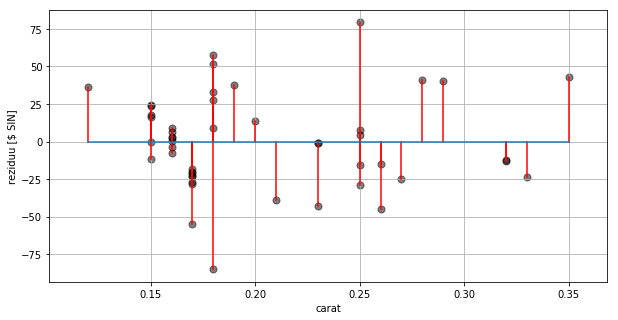

In [9]:
# scatter plot pentru residuals
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set(xlabel="carat", ylabel="reziduu [$ SIN]")
ax.grid(True)
plt.show()

In [10]:
print(np.sqrt(np.sum(lm.resid**2)/(len(lm.resid) - 2)))

31.84052226503175


intercept: 0.9829151824546452 coefficient: 1.2960069726266952


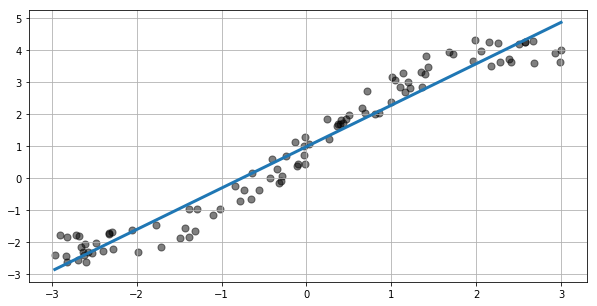

In [11]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6 - 3
y = x + np.sin(x) + np.random.rand(100) + np.sqrt(0.2)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

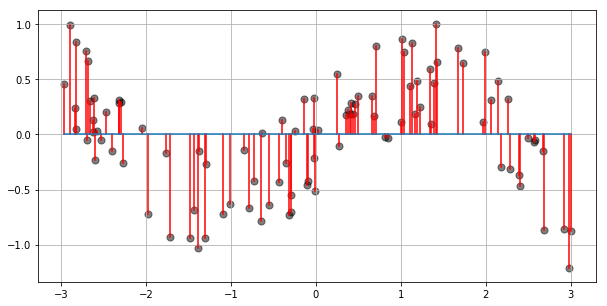

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.grid(True)
plt.show()

intercept: -0.00011343674432179318 coefficient: 1.0000242747779358


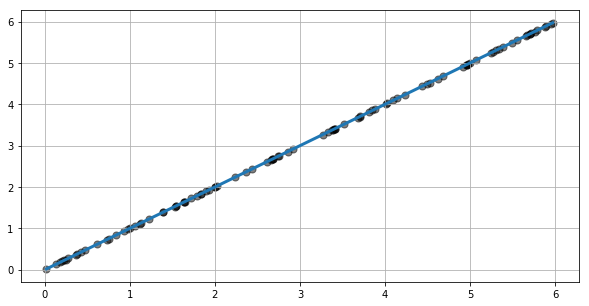

In [13]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6
y = x + (np.random.rand(100) - 0.5) * .001 * x

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

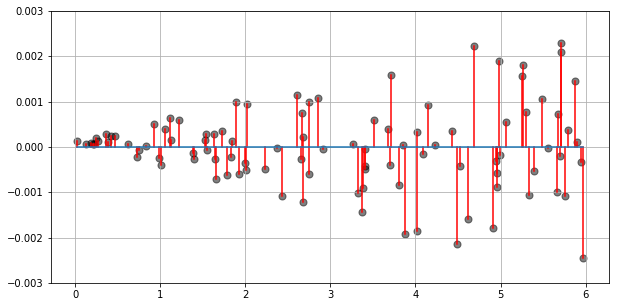

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set_ylim(-0.003, 0.003)
ax.grid(True)
plt.show()

# Constructia statisticilor pentru coeficientii regresiei

In [15]:
# vezi documentatia, http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)

stat_beta0, stat_beta1 = beta0 / se_beta0, beta1 / se_beta1
p_beta0 = 2 * stats.t.sf(np.abs(stat_beta0), df=n-2)
p_beta1 = 2 * stats.t.sf(np.abs(stat_beta1), df=n-2)
i_beta0 = beta0 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta0
i_beta1 = beta1 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta1

intercept: -259.6259071915547 coefficient: 3721.024851550472
sigma: 31.84052226503175


In [16]:
df1 = pd.DataFrame([['beta0', beta0, se_beta0, stat_beta0, p_beta0, i_beta0[0], i_beta0[1]],
                   ['beta1', beta1, se_beta1, stat_beta1, p_beta1, i_beta1[0], i_beta1[1]]],
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
df2 = pd.DataFrame([['beta0', lm.params[0], lm.bse[0], lm.tvalues[0], lm.pvalues[0], lm.conf_int()[0][0], 
                     lm.conf_int()[0][1]],
                    ['beta1', lm.params[1], lm.bse[1], lm.tvalues[1], lm.pvalues[1], lm.conf_int()[1][0], 
                     lm.conf_int()[1][1]]],                  
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
print(df1)
print(df2)

  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  
  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  


In [17]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Sun, 12 May 2019   Prob (F-statistic):           6.75e-40
Time:                        11:34:22   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.0

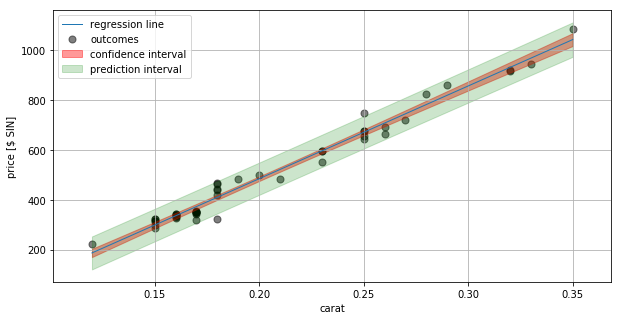

In [18]:
def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

# Laborator

__Q1__. Potriviți o regresie liniară pentru setul father.son cu father.height ca și predictor pentru son.height. 

a) Dați p-value pentru panta regresiei și formulați cele două ipoteze și interpretați rezultatul testului.

b) Interpretați de asemenea și intercept-ul. Centrați x în zero, re-aplicați regresia și interpretați intercept-ul.

__Q2__. Pentru același set father.son, preziceți înălțimea fiului dacă tatăl are înălțimea 80. Ați recomanda această predicție? Care este intervalul de confidență asociat predicției (care este intevalul de valori 95%)?

__Q3__. Pentru setul mtcars:

a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor. Dați interpretarea coeficienților, recentrînd x dacă e necesar. 

b) Puneți dreapta de regresie pe un scatterplot.

c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

d) Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct, respectiv folosind modelul calculat.

e) Care este R-squared și ce exprimă el pentru acest caz?

__Q4__. Pentru setul father.son:

a) Calculați intervalul de confidență pentru intercept și pentru slope.

b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților (confidence interval pentru predicție, într-un punct dat).

d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență pentru valoarea așteptată respectiv predicție.

__Q5__. Pentru setul mtcars, realizați același lucruri ca la întrebarea anterioară.

__Q6__. Construiți două dataset-uri, y funcție de x, unul fără și altul cu variație reziduală (heteroscedasticity). x-urile vor fi comune (de exemplu, x = 1 .. 10). Mediile și dispersiile lor trebuie să fie egale. 

a) Determinați dreptele de regresie.

b) Ridicați diagrama reziduurilor.

c) Determinați R-squared.

d) Afișați intevalele de confidență pentru răspunsul așteptat (dreapta de regresie) respectiv pentru predicție.

Ce concluzii trageți?